In [55]:
###To use: Add your triggers to the list below, then run the entire script! (Cell > Run All)
###At the end you should see a table with the trigger number, RGB color, Hex code, and the color itself.

triggers = [32, 4, 16, 2, 1, 8]

In [56]:
#Table of Vpixx/trigger line correspondence
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [57]:
def powers_of_two(x):
    powers = []
    i = 1
    while i <= x:
        if i & x:
            powers.append(int(math.log2(i)))
        i <<= 1
    return powers

In [58]:
def rgb(powers):
    rgb = [0,0,0]
    if len(powers) < 1:
        print("Invalid trigger number!")
        return None
    else:
        for num in powers:
            if num == 0:
                rgb[0] += 4
            elif num == 1:
                rgb[0] += 16
            elif num == 2:
                rgb[0] += 64
            elif num == 3:
                rgb[1] += 1
            elif num == 4:
                rgb[1] += 4
            elif num == 5:
                rgb[1] += 16
            elif num == 6:
                rgb[1] += 64
            elif num == 7:
                rgb[2] += 1
            else:
                print("Invalid trigger number!")
                return None
    return (rgb, matplotlib.colors.to_hex([x/255 for x in rgb]))

In [59]:
all_rgb = []
all_hex = []

for trig in triggers:
    color = rgb(powers_of_two(trig))
    if color != None:
        all_rgb.append(color[0])
        all_hex.append(color[1])
    else:
        print(f"Invalid trigger! ({trig})")

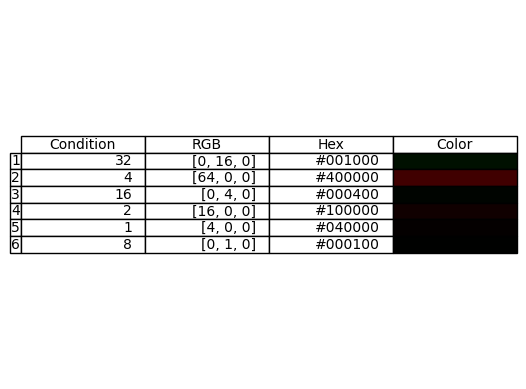

In [60]:
#Plotting

columns = ('Condition', 'RGB', 'Hex', 'Color')
colors = [['#FFFFFF']*len(triggers), ['#FFFFFF']*len(triggers), ['#FFFFFF']*len(triggers), [x for x in all_hex]]
cell_text = [[x for x in triggers], [str(x) for x in all_rgb], [x for x in all_hex],['']*len(triggers)]

colors2 = np.array(colors).T.tolist()
cell_text2 = np.array(cell_text).T.tolist()

fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')
the_table = plt.table(cellText=cell_text2,
                      cellColours=colors2,
                      rowLabels=[i for i in range(1, len(triggers)+1)],
                      colLabels=columns, loc ='center')
plt.show()